In [35]:
# Import essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import seaborn as sns

In [26]:
# Settings dataset and variables
df_M = pd.read_csv("dataset/Master_Ranked_Games.csv") # Master Ranked Game Data

df_M_Win = df_M["blueWins"]
df_M_first_PlayerKill = df_M["blueFirstBlood"]
df_M_first_Tower = df_M["blueFirstTower"]
df_M_first_Dragon = df_M["blueFirstDragon"]
df_M_first_Inhibitor = df_M["blueFirstInhibitor"]
df_M_first_Baron = df_M["blueFirstBaron"]

In [27]:
# Setting Matrices
bias = [1] * len(df_M_Win)
matrix_X = np.column_stack([  
    bias,
    df_M_first_PlayerKill,
    df_M_first_Tower,
    df_M_first_Dragon,
    df_M_first_Inhibitor,
    df_M_first_Baron,
])

# Setting training set and test set
train_x, test_x, train_y, test_y = train_test_split(
    matrix_X, df_M_Win, random_state=42
)

In [40]:
# Training the models
lr = LogisticRegression()
lr.fit(train_x, train_y)

print(lr.coef_, lr.intercept_)

train_y_hat = lr.predict(train_x)
test_y_hat = lr.predict(test_x)

[[-3.82316323e-04  4.73212883e-01  1.44063942e+00  8.86187723e-01
   3.00936284e+00  1.11144122e+00]] [-2.59952551]


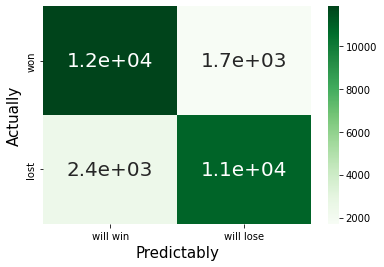

In [55]:
confusionMatrix = confusion_matrix(test_y, test_y_hat)
sns.heatmap(confusionMatrix, annot=True, annot_kws={"size": 20}, cmap='Greens')
plt.xlabel('Predictably', fontsize=15)
plt.ylabel('Actually', fontsize=15)
plt.xticks([0.5,1.5], ['will win', 'will lose'])
plt.yticks([0.5,1.5], ['won', 'lost'])
TN, FP, FN, TP = confusionMatrix.ravel()
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()


In [44]:
# Evaluating Performance of the Model
print("# Evaluating Performance of the Model")
print("Accuracy : {:.3f}".format(accuracy_score(test_y, test_y_hat)))
print("Precision : {:.3f}".format(precision_score(test_y, test_y_hat)))
print("Sensitivity : {:.3f}".format(recall_score(test_y, test_y_hat)))
print("Specificity : {:.3f}".format(TN / (FP + TN)))
print("F1 score : {:.3f}".format(f1_score(test_y, test_y_hat)))

# Evaluating Performance of the Model
Accuracy : 0.847
Precision : 0.864
Sensitivity : 0.820
Specificity : 0.874
F1 score : 0.841


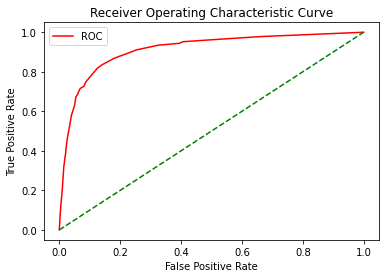

AUC : 0.911


In [42]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
prob = lr.predict_proba(test_x)
prob = prob[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, prob)
plot_roc_curve(fpr, tpr)

from sklearn.metrics import auc
print("AUC : {:.3f}".format(auc(fpr, tpr)))